In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
%matplotlib inline

In [40]:
rhpass=pd.read_csv("filter-user-rp.csv", parse_dates=['Time'])
rhpass.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,9,2011-11-04 21:04:51,10.10.10.15,10.10.10.5,FTP,66,Request: USER guest
1,22,2011-11-04 21:04:51,10.10.10.15,10.10.10.5,FTP,66,Request: USER guest
2,35,2011-11-04 21:04:51,10.10.10.15,10.10.10.5,FTP,66,Request: USER guest
3,48,2011-11-04 21:04:51,10.10.10.15,10.10.10.5,FTP,66,Request: USER guest
4,61,2011-11-04 21:04:51,10.10.10.15,10.10.10.5,FTP,66,Request: USER guest


In [41]:
rhpass["Type"] = rhpass.apply(lambda x: "Client" if x["Source"] == rhpass.irow(0)["Source"] else "Server", axis=1)

In [42]:
rhpass.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Type
0,9,2011-11-04 21:04:51,10.10.10.15,10.10.10.5,FTP,66,Request: USER guest,Client
1,22,2011-11-04 21:04:51,10.10.10.15,10.10.10.5,FTP,66,Request: USER guest,Client
2,35,2011-11-04 21:04:51,10.10.10.15,10.10.10.5,FTP,66,Request: USER guest,Client
3,48,2011-11-04 21:04:51,10.10.10.15,10.10.10.5,FTP,66,Request: USER guest,Client
4,61,2011-11-04 21:04:51,10.10.10.15,10.10.10.5,FTP,66,Request: USER guest,Client


In [43]:
infodata2 = rhpass[['Length','Time','Info']]
infodata2.head()

,Length,Time,Info
0,66,2011-11-04 21:04:51,Request: USER guest
1,66,2011-11-04 21:04:51,Request: USER guest
2,66,2011-11-04 21:04:51,Request: USER guest
3,66,2011-11-04 21:04:51,Request: USER guest
4,66,2011-11-04 21:04:51,Request: USER guest


In [44]:
infodata2 = infodata2.set_index('Time')
infodata2.head()

,Length,Info
Time,,
2011-11-04 21:04:51,66,Request: USER guest
2011-11-04 21:04:51,66,Request: USER guest
2011-11-04 21:04:51,66,Request: USER guest
2011-11-04 21:04:51,66,Request: USER guest
2011-11-04 21:04:51,66,Request: USER guest


In [45]:
infodata2.resample('T',how=sum).head()

,Length
Time,
2011-11-04 21:04:00,2442
2011-11-04 21:05:00,16764
2011-11-04 21:06:00,16896
2011-11-04 21:07:00,16632
2011-11-04 21:08:00,16764


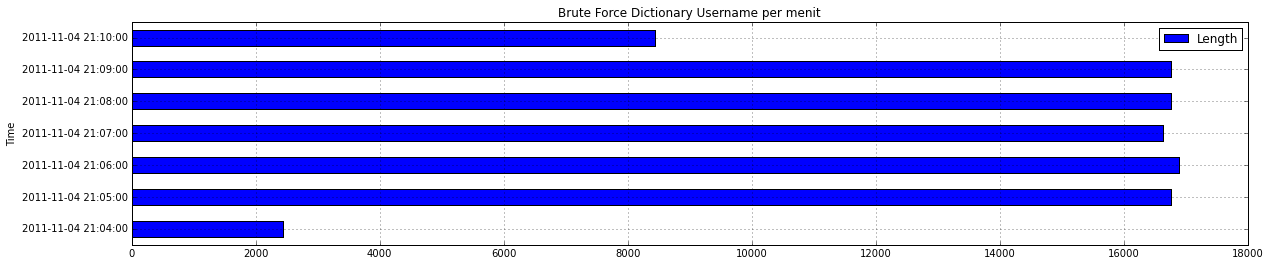

In [46]:
infodata2_plot = infodata2.resample('T',how=sum).plot(kind="barh",title="Brute Force Dictionary Username per menit",style="r",figsize=(20,4))

In [47]:
fig = infodata2_plot.get_figure()
fig.savefig("Brute-force-list-username-permenit.png")

In [48]:
infodata2.resample('S',how=sum).head()

,Length
Time,
2011-11-04 21:04:51,330
2011-11-04 21:04:52,132
2011-11-04 21:04:53,396
2011-11-04 21:04:54,264
2011-11-04 21:04:55,198


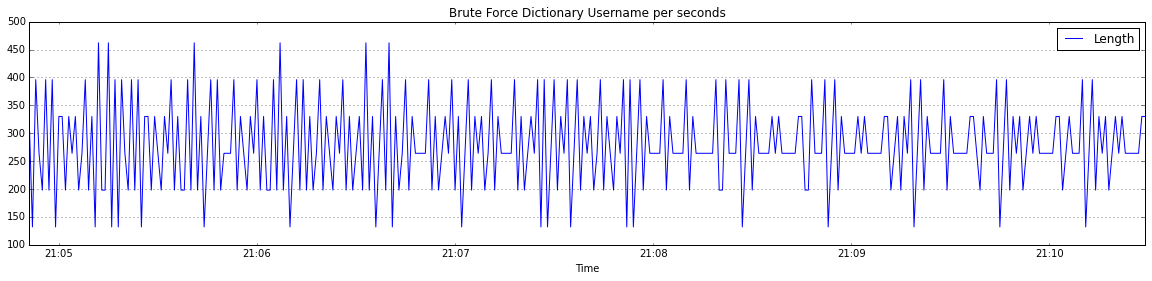

In [49]:
infodata2_plot = infodata2.resample('S',how=sum).plot(kind="line",title="Brute Force Dictionary Username per seconds",figsize=(20,4))

In [50]:
fig = infodata2_plot.get_figure()
fig.savefig("Brute Force Dictionary username.png")